In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Loading the Data Set
data = pd.read_csv("../data/cleaned_data.csv")


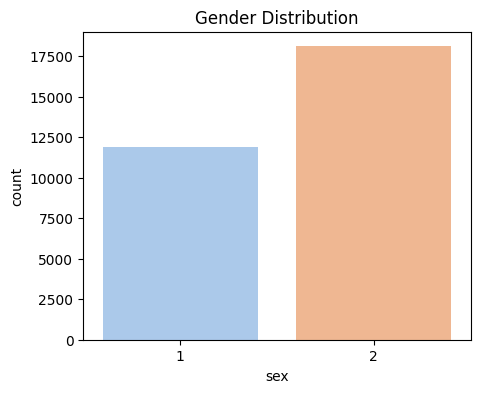

In [ ]:
# Gender distribution
plt.figure(figsize=(5,4))
sns.countplot(x='sex', data=data, palette='pastel', legend=False)
plt.title('Gender Distribution')
plt.show()


### Education distribution


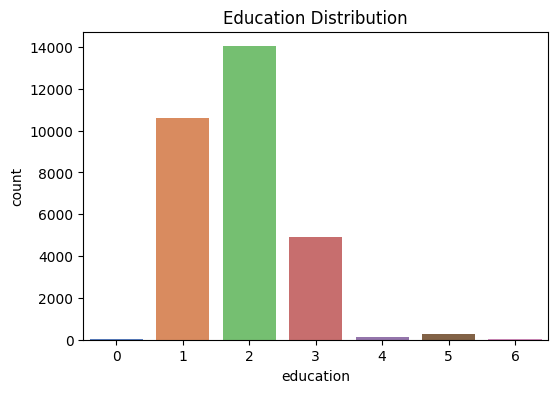

In [ ]:
# Education distribution
plt.figure(figsize=(6,4))
sns.countplot(x='education', data=data, palette='muted')
plt.title('Education Distribution')
plt.show()

### Marriage status distribution


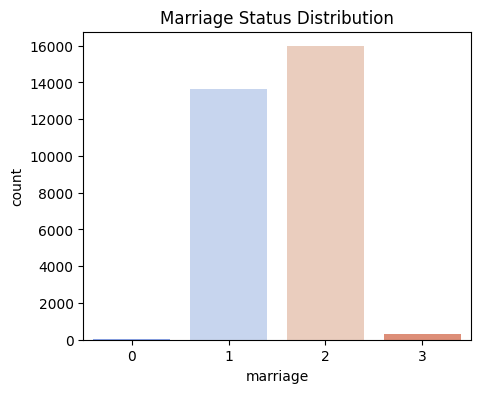

In [ ]:
# Marriage status distribution
plt.figure(figsize=(5,4))
sns.countplot(x='marriage', data=data, palette='coolwarm')
plt.title('Marriage Status Distribution')
plt.show()


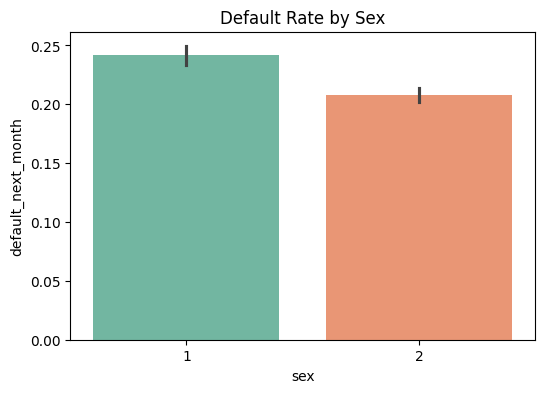

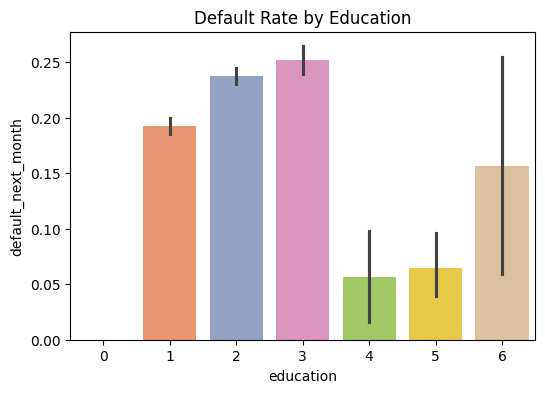

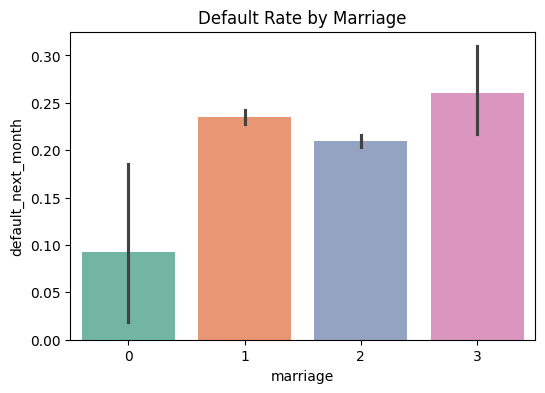

In [ ]:
# Default rate by gender, education, and marriage
features = ['sex', 'education', 'marriage']
for f in features:
    plt.figure(figsize=(6,4))
    sns.barplot(x=f, y='default_next_month', data=data, palette='Set2')
    plt.title(f'Default Rate by {f.capitalize()}')
    plt.show()


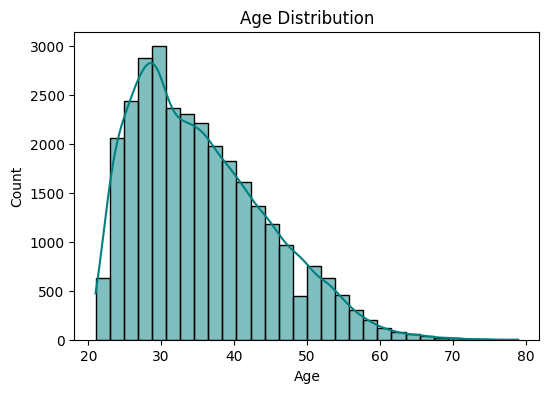

In [ ]:
# Distribution of Age
plt.figure(figsize=(6,4))
sns.histplot(data['age'], kde=True, bins=30, color='teal')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


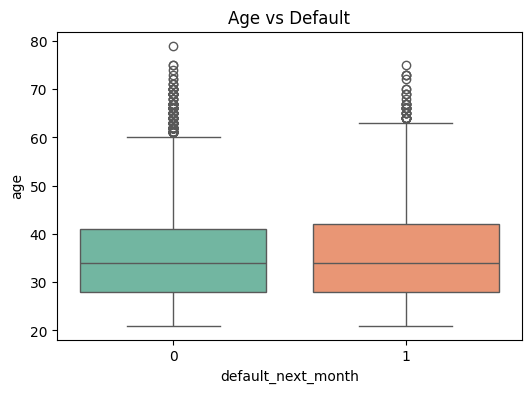

In [ ]:
# Age vs Default
plt.figure(figsize=(6,4))
sns.boxplot(x='default_next_month', y='age', data=data, palette='Set2')
plt.title('Age vs Default')
plt.show()

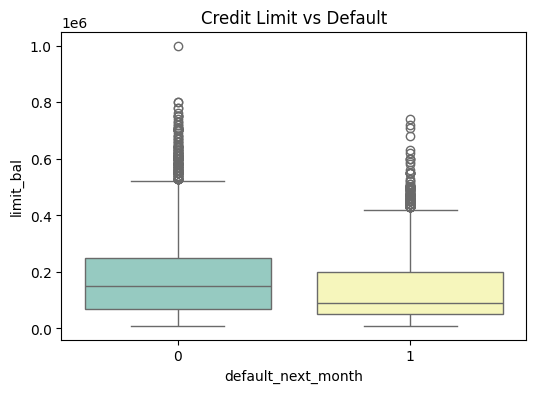

In [ ]:
# Credit Limit vs Default
plt.figure(figsize=(6,4))
sns.boxplot(x='default_next_month', y='limit_bal', data=data, palette='Set3')
plt.title('Credit Limit vs Default')
plt.show()

### Repayment status

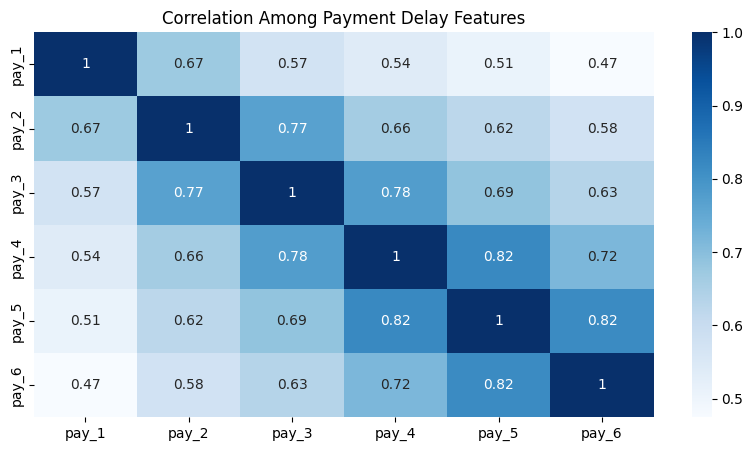

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
default_next_month,,,,,,
0,-0.211222,-0.301917,-0.316256,-0.355633,-0.389488,-0.405624
1,0.668174,0.458258,0.362116,0.254521,0.167872,0.112116


In [ ]:
pay_cols = [f'pay_{i}' for i in range(1,7)]

plt.figure(figsize=(10,5))
sns.heatmap(data[pay_cols].corr(), annot=True, cmap='Blues')
plt.title('Correlation Among Payment Delay Features')
plt.show()

# Average payment delay by default status
data[pay_cols + ['default_next_month']].groupby('default_next_month').mean()


### bill amount analysis

In [ ]:
bill_cols = [f'bill_amt{i}' for i in range(1,7)]

# Bill amounts vs default
data[bill_cols + ['default_next_month']].groupby('default_next_month').mean()


,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
default_next_month,,,,,,
0,51994.227273,49717.435670,47533.365605,43611.165254,40530.445343,39042.268704
1,48509.162297,47283.617842,45181.598855,42036.950573,39540.190476,38271.435503


### payment amount analysis

In [ ]:
pay_amt_cols = [f'pay_amt{i}' for i in range(1,7)]

# Payment amounts vs default
data[pay_amt_cols + ['default_next_month']].groupby('default_next_month').mean()


,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
default_next_month,,,,,,
0,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769
1,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068


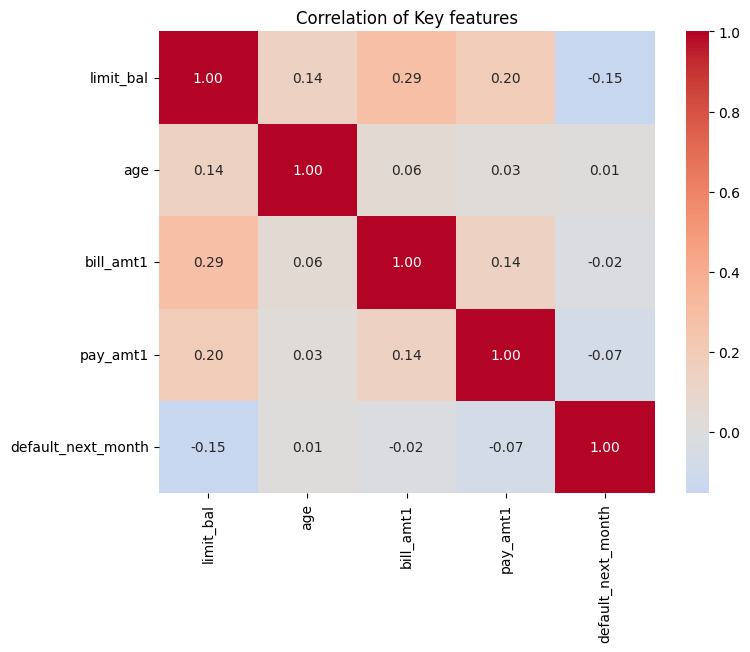

In [ ]:
# Correlation matrix for key features
features = ['limit_bal', 'age', 'bill_amt1', 'pay_amt1', 'default_next_month']
plt.figure(figsize=(8,6))
sns.heatmap(data[features].corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation of Key features')
plt.show()

### Outliers detection

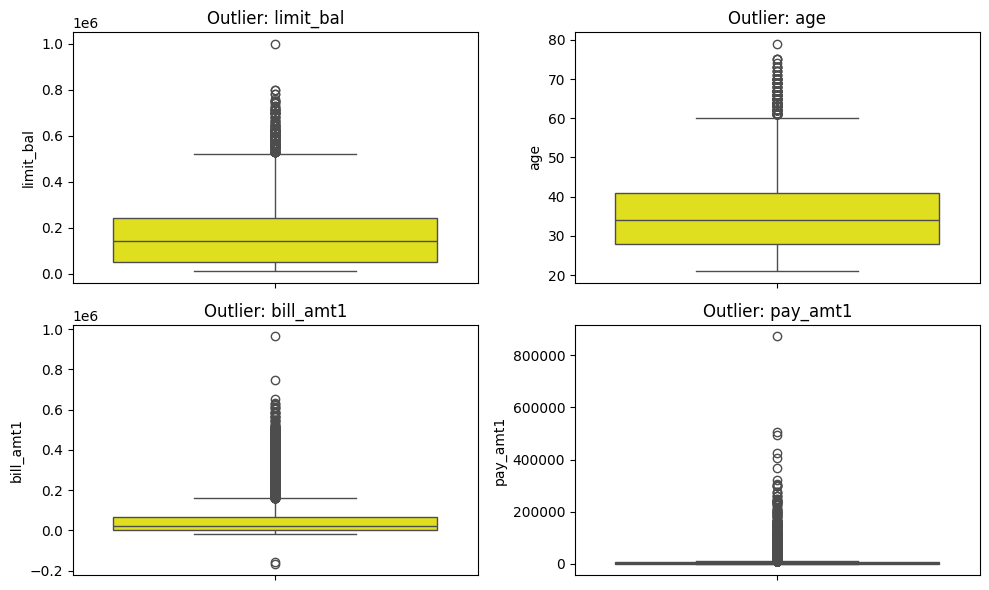

In [ ]:
features = ['limit_bal', 'age', 'bill_amt1', 'pay_amt1']

plt.figure(figsize=(10,6))
for i, col in enumerate(features, 1):
    plt.subplot(2,2,i)
    sns.boxplot(y=data[col], color='yellow')
    plt.title(f'Outlier: {col}')
plt.tight_layout()
plt.show()
